In [1]:
import pandas as pd
import numpy as np
from geopy import distance

In [2]:
# coordinates of all features we are basing our calculations on
park_coords = [(40.788443, -96.625169), (40.8486364, -96.6265152), (40.802552, -96.683902)] # [(40.788443, -96.625169), (40.8486364, -96.6265152), (40.780881, -96.749507), (40.907023, -96.787442), (40.802552, -96.683902), (40.822195, -96.728384), (40.745823, -96.652667)]
downtown_coords = [(40.816252, -96.710022)] # [(40.8091088, -96.700517), (40.816252, -96.710022)] # haymarket and capitol
airport_coords = [(40.842782, -96.789832)]
mall_coords = [(40.815374, -96.6369813), (40.740345, -96.679056)]
golf_coords = [(40.7745297, -96.6340978), (40.8658904, -96.7389314), (40.8425529, -96.6186088), (40.7790217, -96.7712782), (40.7925746, -96.6670068), (40.7791021, -96.6873144), (40.78844, -96.619738), (40.869583, -96.7170281), (40.776931, -96.5927849), (40.7639485, -96.5969219), (40.7448012, -96.6077196), (40.8119722, -96.5457124)]
wholesaler_coords = [(40.7398833, -96.6976076), (40.857762, -96.681857), (40.7374095, -96.6009262)]
fancy_groceries_coords = [(40.7409727, -96.6748487), (40.8129007, -96.6391536)]

In [3]:
df = pd.read_csv('FullData.csv')
print("total entries including na: " + str(len(df)))

df = df[df['lat'] != 'na']
print("total entries with lat/lon: " + str(len(df)))

df = df[df['lat'].astype(float) >= 40]
df = df[df['lat'].astype(float) <= 42]

df = df[df['lon'].astype(float) >= -97]
df = df[df['lon'].astype(float) <= -96]

print("total entries with Lancaster lat/lon: " + str(len(df)))
df.reset_index(drop=True, inplace=True)

total entries including na: 38758
total entries with lat/lon: 36722
total entries with Lancaster lat/lon: 36643


In [4]:
df['dist_park'] = 'None'
df['dist_downtown'] = 'None'
df['dist_airport'] = 'None'
df['dist_mall'] = 'None'
df['dist_golf'] = 'None'
df['dist_wholesaler'] = 'None'
df['dist_fancy_grocers'] = 'None'

In [5]:
#distance with library
def dist_with_lib(point1,point2):
#     print('distance is ' + str(abs(point1[0]-point2[0]) + abs(point1[1]-point2[1])))
#     return abs(point1[0]-point2[0]) + abs(point1[1]-point2[1])
    miles = distance.distance(point1,point2).miles
    return miles

def dist_from_feature(feature_array, current_row):
    if(current_row['lat'] != 'na'):
        distances = []
        for feature in feature_array:
                distances.append(dist_with_lib(feature, (float(current_row['lat']), float(current_row['lon']))))
        return min(distances)

In [6]:
df.head()

,Situs,city,zip,lat,lon,addr,dist_park,dist_downtown,dist_airport,dist_mall,dist_golf,dist_wholesaler,dist_fancy_grocers
0,"3817 DUDLEY ST, LINCOLN, NE 68503",LINCOLN,68503,40.825578444444446,-96.66587981481482,3817 DUDLEY ST,None,None,None,None,None,None,None
1,"802 N LAKESHORE DR, LINCOLN, NE 68528",LINCOLN,68528,40.82969630114534,-96.74044722145769,802 N LAKESHORE DR,None,None,None,None,None,None,None
2,"1208 STARVIEW LN, LINCOLN, NE 68512",LINCOLN,68512,40.75890030482155,-96.70395435186813,1208 STARVIEW LN,None,None,None,None,None,None,None
3,"9400 LARGE'S CT, LINCOLN, NE 68512",LINCOLN,68512,40.71798914143969,-96.68330070791247,9400 LARGE'S CT,None,None,None,None,None,None,None
4,"2100 FOLKWAYS BLVD, LINCOLN, NE 68521",LINCOLN,68521,40.866912,-96.689811,2100 FOLKWAYS BLVD,None,None,None,None,None,None,None


In [7]:
for index, row in df.iterrows():
    df.iloc[index, df.columns.get_loc('dist_park')] = dist_from_feature(park_coords, row)
    df.iloc[index, df.columns.get_loc('dist_downtown')] = dist_from_feature(downtown_coords, row)
    df.iloc[index, df.columns.get_loc('dist_airport')] = dist_from_feature(airport_coords, row)
    df.iloc[index, df.columns.get_loc('dist_mall')] = dist_from_feature(mall_coords, row)
    df.iloc[index, df.columns.get_loc('dist_golf')] = dist_from_feature(golf_coords, row)
    df.iloc[index, df.columns.get_loc('dist_wholesaler')] = dist_from_feature(wholesaler_coords, row)
    df.iloc[index, df.columns.get_loc('dist_fancy_grocers')] = dist_from_feature(fancy_groceries_coords, row)

In [8]:
from sklearn.cluster import KMeans

X_cluster_on = df[['lat', 'lon']]
best_cluster_size = 11
kmeans = KMeans(n_clusters=best_cluster_size).fit(X_cluster_on)
df['cluster'] = kmeans.labels_

In [9]:
df = df.dropna()
print(df.head())

                                    Situs      city     zip  \
0      3817 DUDLEY ST, LINCOLN, NE  68503   LINCOLN   68503   
1  802 N LAKESHORE DR, LINCOLN, NE  68528   LINCOLN   68528   
2    1208 STARVIEW LN, LINCOLN, NE  68512   LINCOLN   68512   
3     9400 LARGE'S CT, LINCOLN, NE  68512   LINCOLN   68512   
4  2100 FOLKWAYS BLVD, LINCOLN, NE  68521   LINCOLN   68521   

                  lat                 lon                addr dist_park  \
0  40.825578444444446  -96.66587981481482      3817 DUDLEY ST  1.848599   
1   40.82969630114534  -96.74044722145769  802 N LAKESHORE DR  3.506511   
2   40.75890030482155  -96.70395435186813    1208 STARVIEW LN  3.190456   
3   40.71798914143969  -96.68330070791247     9400 LARGE'S CT  5.739261   
4           40.866912          -96.689811  2100 FOLKWAYS BLVD  3.547849   

  dist_downtown dist_airport dist_mall dist_golf dist_wholesaler  \
0      2.401779     6.603904  1.670535  2.278144        2.373377   
1      1.845046     2.741166  5.51

In [10]:
df.to_csv('./results_closest_features.csv')

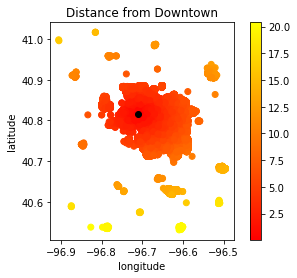

In [11]:
import matplotlib.pyplot as plt

feat = 'dist_downtown'
df_sample = df # df.sample(100)

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_downtown.values, cmap = 'autumn');

for coord in downtown_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Downtown")
plt.show()

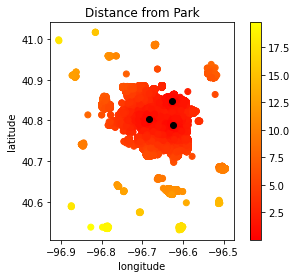

In [12]:
feat = 'dist_park'

df_sample = df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_park.values, cmap = 'autumn');

for coord in park_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Park")
plt.show()

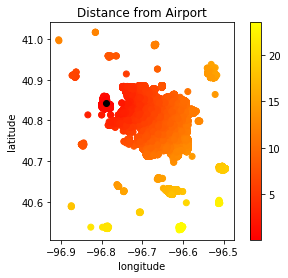

In [13]:
feat = 'dist_airport'

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_airport.values, cmap = 'autumn');

for coord in airport_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Airport")
plt.show()

In [ ]:
feat = 'dist_mall'

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_mall.values, cmap = 'autumn');

for coord in mall_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Mall")
plt.show()

In [ ]:
feat = 'dist_golf'

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_golf.values, cmap = 'autumn');

for coord in golf_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Golf")
plt.show()

In [ ]:
feat = 'dist_wholesaler'

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_wholesaler.values, cmap = 'autumn');

for coord in wholesaler_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Wholesaler")
plt.show()

In [ ]:
feat = 'dist_fancy_grocers'

df_sample =df_sample[df_sample[feat] != 'None']
df_sample[feat] = df_sample[feat].astype(float)
df_sample['lat'] = df_sample['lat'].astype(float)
df_sample['lon'] = df_sample['lon'].astype(float)


res = plt.scatter(x=df_sample.lon.values, y=df_sample.lat.values, c = df_sample.dist_fancy_grocers.values, cmap = 'autumn');

for coord in fancy_groceries_coords:
    plt.scatter(coord[1], coord[0], c = 'black')

plt.xlabel("longitude")
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.colorbar(res)

plt.title("Distance from Fancy Grocers")
plt.show()